<a href="https://colab.research.google.com/github/ZahraBarati99/CMD/blob/main/CMD2/CDM2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FastICA, TruncatedSVD
from sklearn.feature_selection import SelectKBest,f_classif, f_regression, RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving breast_cancer_bd.csv to breast_cancer_bd (1).csv
Saving HousingData.csv to HousingData (1).csv
Saving Iris.csv to Iris (1).csv


Step 1 – Select three data mining problems:

In [ ]:
# Wisconsin Breast Cancer

# Upload dataset
df_cancer = pd.read_csv("breast_cancer_bd.csv")
df_cancer_full = df_cancer.copy()

# Replacing non-numeric characters with NaN
df_cancer_full = df_cancer_full.replace(['?', 'NA'], np.nan)

# Delete rows with missing values
before = df_cancer_full.shape[0]
df_cancer_full = df_cancer_full.dropna()
after = df_cancer_full.shape[0]

print(f"Number of rows before deletion= {before} & after deletion= {after}")
print(f"\n{'-'*160}\n")

# Convert all numeric columns to float type
for col in df_cancer_full.columns:
    try:
        df_cancer_full[col] = df_cancer_full[col].astype(float)
    except:
        pass

df_cancer_full.head()

Number of rows before deletion= 699 & after deletion= 683

----------------------------------------------------------------------------------------------------------------------------------------------------------------



,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025.0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0
1,1002945.0,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2.0
2,1015425.0,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2.0
3,1016277.0,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,2.0
4,1017023.0,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,2.0


In [ ]:
# Boston Housing

# Upload dataset
df_house = pd.read_csv("HousingData.csv")
df_house_full = df_house.copy()

# Replacing non-numeric characters with NaN
df_house_full = df_house_full.replace(['?', 'NA'], np.nan)

# Delete rows with missing values
before = df_house_full.shape[0]
df_house_full = df_house_full.dropna()
after = df_house_full.shape[0]

print(f"Number of rows before deletion= {before} & after deletion= {after}")
print(f"\n{'-'*100}\n")

# Convert all numeric columns to float type
for col in df_house_full.columns:
    try:
        df_house_full[col] = df_house_full[col].astype(float)
    except:
        pass

df_house_full.head()


Number of rows before deletion= 506 & after deletion= 394

----------------------------------------------------------------------------------------------------



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7


In [ ]:
# UCI Iris

# Upload dataset
df_iris = pd.read_csv("Iris.csv")
df_iris_full = df_iris.copy()

# Replacing non-numeric characters with NaN
df_iris_full = df_iris_full.replace(['?', 'NA'], np.nan)

# Delete rows with missing values
before = df_iris_full.shape[0]
df_iris_full = df_iris_full.dropna()
after = df_iris_full.shape[0]

print(f"Number of rows before deletion= {before} & after deletion= {after}")
print(f"\n{'-'*80}\n")

# Convert all numeric columns to float type
for col in df_iris_full.columns:
    try:
        df_iris_full[col] = df_iris_full[col].astype(float)
    except:
        pass

df_iris_full.head()


Number of rows before deletion= 150 & after deletion= 150

--------------------------------------------------------------------------------



,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1.0,5.1,3.5,1.4,0.2,Iris-setosa
1,2.0,4.9,3.0,1.4,0.2,Iris-setosa
2,3.0,4.7,3.2,1.3,0.2,Iris-setosa
3,4.0,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# ‌‌Basic Information

datasets = {
    "Wisconsin Breast Cancer": df_cancer_full,
    "Boston Housing": df_house_full,
    "UCI Iris": df_iris_full
}

for name, df in datasets.items():
    print(f"\n{'-'*100}\n{name} Dataset")
    print(f"Number of rows: {df.shape[0]}")
    print(f"Number of columns: {df.shape[1]}")
    print("\n Statistical summary:")
    print(df.describe().round(2))



----------------------------------------------------------------------------------------------------
Wisconsin Breast Cancer Dataset
Number of rows: 683
Number of columns: 11

 Statistical summary:
       Sample code number  Clump Thickness  Uniformity of Cell Size  \
count              683.00           683.00                   683.00   
mean           1076720.23             4.44                     3.15   
std             620644.05             2.82                     3.07   
min              63375.00             1.00                     1.00   
25%             877617.00             2.00                     1.00   
50%            1171795.00             4.00                     1.00   
75%            1238705.00             6.00                     5.00   
max           13454352.00            10.00                    10.00   

       Uniformity of Cell Shape  Marginal Adhesion  \
count                    683.00             683.00   
mean                       3.22               2.83   

Step 2 – Checking the initial collinearity of the data:


----------------------------------------------------------------------------------------------------
Wisconsin Breast Cancer Dataset

 Correlation Matrix:
                             Clump Thickness  Uniformity of Cell Size  \
Clump Thickness                         1.00                     0.64   
Uniformity of Cell Size                 0.64                     1.00   
Uniformity of Cell Shape                0.65                     0.91   
Marginal Adhesion                       0.49                     0.71   
Single Epithelial Cell Size             0.52                     0.75   
Bare Nuclei                             0.59                     0.69   
Bland Chromatin                         0.55                     0.76   
Normal Nucleoli                         0.53                     0.72   
Mitoses                                 0.35                     0.46   

                             Uniformity of Cell Shape  Marginal Adhesion  \
Clump Thickness                      

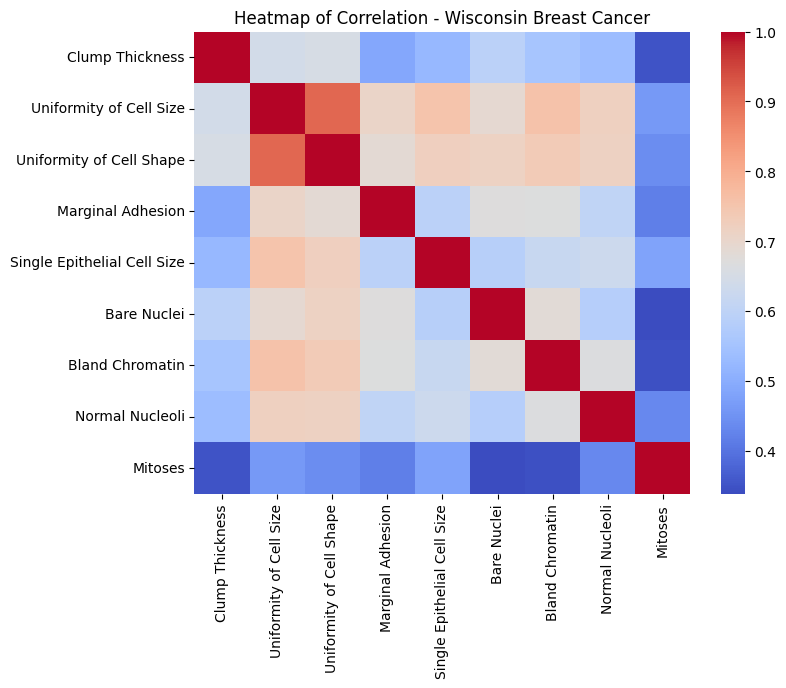


----------------------------------------------------------------------------------------------------
Boston Housing Dataset

 Correlation Matrix:
         CRIM    ZN  INDUS  CHAS   NOX    RM   AGE   DIS   RAD   TAX  PTRATIO  \
CRIM     1.00 -0.19   0.39 -0.05  0.42 -0.23  0.34 -0.37  0.61  0.56     0.27   
ZN      -0.19  1.00  -0.52 -0.03 -0.52  0.34 -0.57  0.65 -0.30 -0.31    -0.42   
INDUS    0.39 -0.52   1.00  0.05  0.76 -0.40  0.64 -0.70  0.59  0.73     0.40   
CHAS    -0.05 -0.03   0.05  1.00  0.08  0.10  0.07 -0.10  0.01 -0.03    -0.10   
NOX      0.42 -0.52   0.76  0.08  1.00 -0.32  0.73 -0.77  0.63  0.68     0.21   
RM      -0.23  0.34  -0.40  0.10 -0.32  1.00 -0.25  0.22 -0.24 -0.32    -0.39   
AGE      0.34 -0.57   0.64  0.07  0.73 -0.25  1.00 -0.75  0.44  0.50     0.26   
DIS     -0.37  0.65  -0.70 -0.10 -0.77  0.22 -0.75  1.00 -0.48 -0.53    -0.23   
RAD      0.61 -0.30   0.59  0.01  0.63 -0.24  0.44 -0.48  1.00  0.90     0.44   
TAX      0.56 -0.31   0.73 -0.03  0.68 -0.3

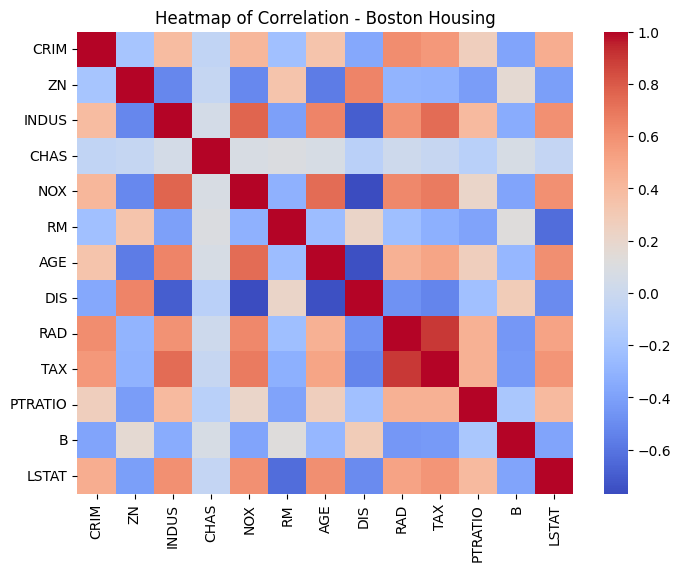


----------------------------------------------------------------------------------------------------
UCI Iris Dataset

 Correlation Matrix:
               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm           1.00         -0.11           0.87          0.82
SepalWidthCm           -0.11          1.00          -0.42         -0.36
PetalLengthCm           0.87         -0.42           1.00          0.96
PetalWidthCm            0.82         -0.36           0.96          1.00


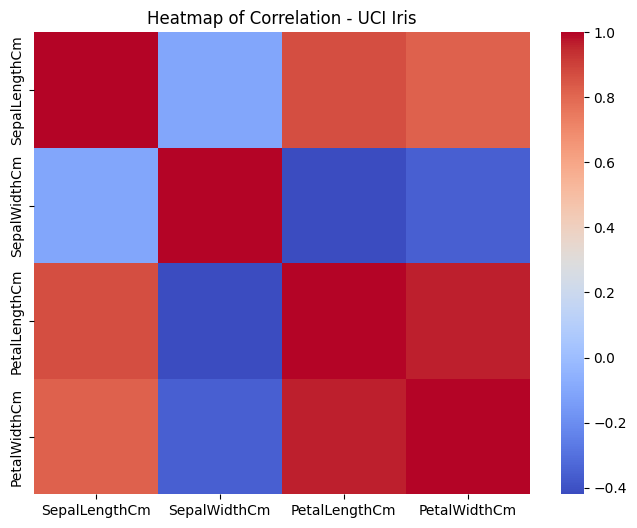

In [ ]:
datasets = {
    "Wisconsin Breast Cancer": df_cancer_full,
    "Boston Housing": df_house_full,
    "UCI Iris": df_iris_full
}

# Define the columns that should be removed for each dataset so that only the features remain.
columns_to_drop = {
    "Wisconsin Breast Cancer": ['Sample code number', 'Class'],
    "Boston Housing": ['MEDV'],
    "UCI Iris": ['Id', 'Species']
}

for name, df in datasets.items():
    print(f"\n{'-'*100}\n{name} Dataset")

    # Features
    features = df.drop(columns=columns_to_drop.get(name, []), errors='ignore')


    # Calculating the correlation matrix
    corr = features.corr()

    print("\n Correlation Matrix:")
    print(corr.round(2))

    # Heatmap Plot
    plt.figure(figsize=(8,6))
    sns.heatmap(corr, cmap='coolwarm', annot=False)
    plt.title(f'Heatmap of Correlation - {name}')
    plt.show()

Step 3 – Extracting Independent Features:

In [ ]:
datasets = {
    "Wisconsin Breast Cancer": df_cancer_full,
    "Boston Housing": df_house_full,
    "UCI Iris": df_iris_full
}

# Define the columns that should be removed for each dataset so that only the features remain.
columns_to_drop = {
    "Wisconsin Breast Cancer": ['Sample code number', 'Class'],
    "Boston Housing": ['MEDV'],
    "UCI Iris": ['Id', 'Species']
}

for name, df in datasets.items():
    print(f"\n{'-'*80}\n{name} Dataset - Feature Extraction (PCA / ICA / SVD)")

    # Features
    features = df.drop(columns=columns_to_drop.get(name, []), errors='ignore')

    # Standardization
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(features)

    # PCA
    pca = PCA().fit(X_scaled)
    var_ratio = np.cumsum(pca.explained_variance_ratio_)

    # Number of components for 95% of the variance
    n_comp = np.argmax(var_ratio >= 0.95) + 1
    total_var = var_ratio[n_comp-1] * 100
    print(f"For {name}: with {n_comp} components, about {total_var:.2f}% of the variance is explained.")
    print(f"{name}: n_components for 95% variance = {n_comp}")


    # ICA
    ica = FastICA(n_components=n_comp, random_state=0)
    X_ica = ica.fit_transform(X_scaled)
    print(f"ICA output {X_ica.shape} includes {n_comp} statistically independent components")


    # SVD
    svd = TruncatedSVD(n_components=n_comp, random_state=0)
    X_svd = svd.fit_transform(X_scaled)
    print(f"SVD output: {X_svd.shape} includes {n_comp} components based on singular value decomposition")

    # Summary of results
    print(f"\nSummary for {name}:")
    print(f"PCA: {n_comp} components ({total_var:.2f}% of variance explained)")
    print(f"ICA: {n_comp} components (no variance criterion, focuses on statistical independence)")
    print(f"SVD: {n_comp} components (same dimensionality as PCA, based on singular values)")




--------------------------------------------------------------------------------
Wisconsin Breast Cancer Dataset - Feature Extraction (PCA / ICA / SVD)
For Wisconsin Breast Cancer: with 7 components, about 96.12% of the variance is explained.
Wisconsin Breast Cancer: n_components for 95% variance = 7
ICA output (683, 7) includes 7 statistically independent components
SVD output: (683, 7) includes 7 components based on singular value decomposition

Summary for Wisconsin Breast Cancer:
PCA: 7 components (96.12% of variance explained)
ICA: 7 components (no variance criterion, focuses on statistical independence)
SVD: 7 components (same dimensionality as PCA, based on singular values)

--------------------------------------------------------------------------------
Boston Housing Dataset - Feature Extraction (PCA / ICA / SVD)
For Boston Housing: with 9 components, about 95.18% of the variance is explained.
Boston Housing: n_components for 95% variance = 9
ICA output (394, 9) includes 9 st

Step 4 – Applying basic feature selection methods:

In [ ]:
datasets = {
    "Wisconsin Breast Cancer": df_cancer_full,
    "Boston Housing": df_house_full,
    "UCI Iris": df_iris_full
}

for name, df in datasets.items():
    print(f"\n{'-'*80}\n{name} Dataset - Feature Selection (SelectKBest / RFE)")

    # Drop target/ID columns
    drop_cols = [c for c in ['Sample code number', 'Class', 'MEDV', 'Id', 'Species'] if c in df.columns]
    features = df.drop(columns=drop_cols, errors='ignore')
    features = features.select_dtypes(include=['number'])

    # Identify the target column
    target_col = None
    for possible_col in ['Class', 'MEDV', 'Species']:
        if possible_col in df.columns:
            target_col = possible_col
            break

    X = features
    y = df[target_col]

    # Encode target if necessary
    if y.dtype == 'object':
        encoder = LabelEncoder()
        y = encoder.fit_transform(y)
    else:
        y = y.astype(float)

    # SelectKBest (using f_regression)
    k = min(3, X.shape[1])
    selector = SelectKBest(score_func=f_regression, k=k)
    X_new = selector.fit_transform(X, y)
    selected_features = X.columns[selector.get_support()]

    print(f"\n Top {k} features selected by SelectKBest:")
    print(selected_features.tolist())

    # RFE (Recursive Feature Elimination)
    model = LinearRegression()
    rfe = RFE(model, n_features_to_select=k)
    rfe.fit(X, y)
    rfe_features = X.columns[rfe.support_]

    print(f"\n Top {k} features selected by RFE:")
    print(rfe_features.tolist())


--------------------------------------------------------------------------------
Wisconsin Breast Cancer Dataset - Feature Selection (SelectKBest / RFE)

 Top 3 features selected by SelectKBest:
['Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Bare Nuclei']

 Top 3 features selected by RFE:
['Clump Thickness', 'Uniformity of Cell Size', 'Bare Nuclei']

--------------------------------------------------------------------------------
Boston Housing Dataset - Feature Selection (SelectKBest / RFE)

 Top 3 features selected by SelectKBest:
['RM', 'PTRATIO', 'LSTAT']

 Top 3 features selected by RFE:
['CHAS', 'NOX', 'RM']

--------------------------------------------------------------------------------
UCI Iris Dataset - Feature Selection (SelectKBest / RFE)

 Top 3 features selected by SelectKBest:
['SepalLengthCm', 'PetalLengthCm', 'PetalWidthCm']

 Top 3 features selected by RFE:
['SepalLengthCm', 'PetalLengthCm', 'PetalWidthCm']


Step 5 – Model Training and Optimization Process Analysis:

A) Regression problem: (Combination of analytical and derivative-based method)

Model 1: Analytical optimization (without iterative derivatives):

In [ ]:
# Dataset for linear regression
df_house_linearregression = df_house_full.copy()

# Split features and target
X = df_house_linearregression.drop(columns=['MEDV'], errors='ignore')
y = df_house_linearregression['MEDV']

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA (keep 95% variance)
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Train Linear Regression on Original and PCA-transformed data
model_original = LinearRegression().fit(X_scaled, y)
model_pca = LinearRegression().fit(X_pca, y)

# Compare coefficients
coef_original = model_original.coef_
coef_pca = model_pca.coef_

print("Linear Regression on Original Data:")
print("Number of coefficients:", len(coef_original))
print("First 5 coefficients:", np.round(coef_original[:5], 4))

print("\nLinear Regression on PCA Data:")
print("Number of coefficients:", len(coef_pca))
print("First 5 coefficients:", np.round(coef_pca[:5], 4))

# Analyze stability (standard deviation of coefficients)
stability_ratio = np.std(coef_original) / np.std(coef_pca)
print(f"\n Coefficient Stability Ratio (Original/PCA): {stability_ratio:.2f}")

Linear Regression on Original Data:
Number of coefficients: 13
First 5 coefficients: [-0.897   1.17    0.2096  0.6997 -2.0299]

Linear Regression on PCA Data:
Number of coefficients: 9
First 5 coefficients: [-2.4069  2.1155  3.4178 -0.7429  2.152 ]

 Coefficient Stability Ratio (Original/PCA): 1.14


Model 2: Derivative-based optimization

SGDRegressor on Original Data:
Iterations until convergence: 114
Final training loss function: squared_error
Mean Squared Error (MSE): 3864596833634055322861568.0000

SGDRegressor on PCA Data:
Iterations until convergence: 112
Final training loss function: squared_error
Mean Squared Error (MSE): 1316361139177351240744960.0000



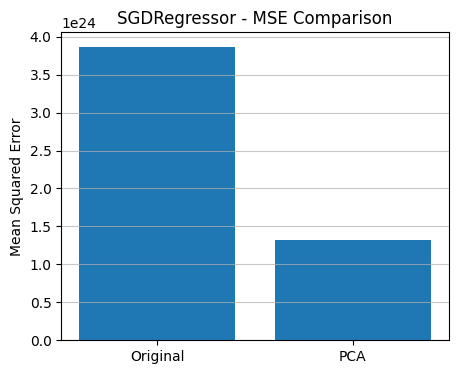

In [ ]:
# Dataset for SGD regression
df_house_SGDregression = df_house_full.copy()

# Split features and target
X = df_house_SGDregression.drop(columns=['MEDV'], errors='ignore')
y = df_house_SGDregression['MEDV']

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA (keep 95% variance)
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Define SGD Regressor
sgd_params = dict(max_iter=1000, tol=0.001, learning_rate='optimal', random_state=0)

sgd_original = SGDRegressor(**sgd_params)
sgd_pca = SGDRegressor(**sgd_params)

# Train both models
sgd_original.fit(X_scaled, y)
sgd_pca.fit(X_pca, y)

# Predict and calculate MSE
y_pred_original = sgd_original.predict(X_scaled)
y_pred_pca = sgd_pca.predict(X_pca)

mse_original = mean_squared_error(y, y_pred_original)
mse_pca = mean_squared_error(y, y_pred_pca)

# Print results
print("SGDRegressor on Original Data:")
print(f"Iterations until convergence: {sgd_original.n_iter_}")
print(f"Final training loss function: {sgd_original.loss}")
print(f"Mean Squared Error (MSE): {mse_original:.4f}")

print("\nSGDRegressor on PCA Data:")
print(f"Iterations until convergence: {sgd_pca.n_iter_}")
print(f"Final training loss function: {sgd_pca.loss}")
print(f"Mean Squared Error (MSE): {mse_pca:.4f}\n")


# Visualization: MSE comparison
plt.figure(figsize=(5,4))
plt.bar(['Original', 'PCA'], [mse_original, mse_pca])
plt.title("SGDRegressor - MSE Comparison")
plt.ylabel("Mean Squared Error")
plt.grid(axis='y', alpha=0.7)
plt.show()

B) Clustering problem: (derivative-free optimization − iterative)

Model: KMeans (based on E-M)

KMeans on Original Data:
Inertia: 140.97
Silhouette Score: 0.4590
Computation Time: 0.0160 seconds

KMeans on PCA Data:
Inertia: 116.11
Silhouette Score: 0.5082
Computation Time: 0.0124 seconds



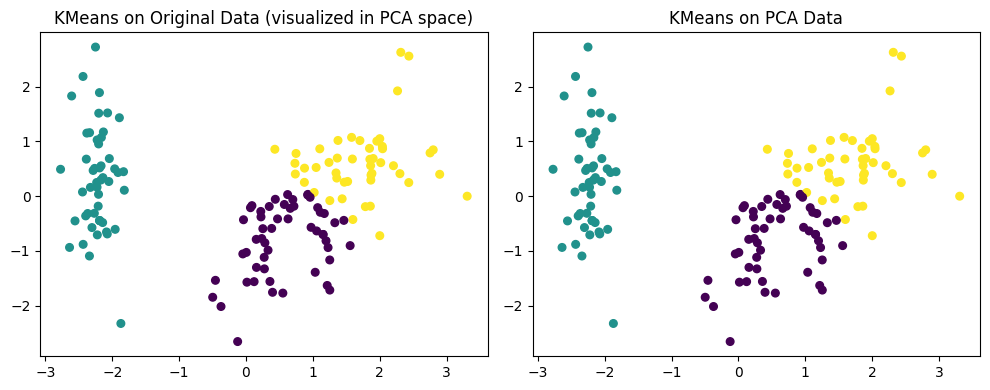

In [ ]:
# Dataset for clustering
df_iris_clustering = df_iris_full.copy()

# Drop ID or target columns
X = df_iris_clustering.drop(columns=['Id', 'Species'], errors='ignore')

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA (keep 2 components for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Define number of clusters
k = 3

# Run KMeans on Original Data
start_time = time.time()
kmeans_orig = KMeans(n_clusters=k, n_init=10, random_state=0)
kmeans_orig.fit(X_scaled)
time_orig = time.time() - start_time

# Run KMeans on PCA Data
start_time = time.time()
kmeans_pca = KMeans(n_clusters=k, n_init=10, random_state=0)
kmeans_pca.fit(X_pca)
time_pca = time.time() - start_time

# Calculate metrics
inertia_orig = kmeans_orig.inertia_
inertia_pca = kmeans_pca.inertia_

sil_orig = silhouette_score(X_scaled, kmeans_orig.labels_)
sil_pca = silhouette_score(X_pca, kmeans_pca.labels_)

# Print results
print("KMeans on Original Data:")
print(f"Inertia: {inertia_orig:.2f}")
print(f"Silhouette Score: {sil_orig:.4f}")
print(f"Computation Time: {time_orig:.4f} seconds")

print("\nKMeans on PCA Data:")
print(f"Inertia: {inertia_pca:.2f}")
print(f"Silhouette Score: {sil_pca:.4f}")
print(f"Computation Time: {time_pca:.4f} seconds\n")

# Visualization
plt.figure(figsize=(10,4))

# Original data clusters (after PCA for display)
plt.subplot(1,2,1)
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans_orig.labels_, cmap='viridis', s=30)
plt.title("KMeans on Original Data (visualized in PCA space)")

# Visualization
plt.subplot(1,2,2)
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans_pca.labels_, cmap='viridis', s=30)
plt.title("KMeans on PCA Data")

plt.tight_layout()
plt.show()

C) Classification problem: (Analysis of distance-based and tree-based models)

Model 1: Distance-Based (Instance-Based):

In [ ]:
# Dataset for classification
df_cancer_classification = df_cancer_full.copy()

# Drop ID column
X = df_cancer_classification.drop(columns=['Sample code number', 'Class'], errors='ignore')
y = df_cancer_classification['Class']

# Binary target normalization (2 → 0, 4 → 1)
y = y.replace({2: 0, 4: 1})

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA (keep 95% variance)
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Define KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Train & Evaluate on Original Data
start_time = time.time()
knn.fit(X_train_scaled, y_train)
pred_orig = knn.predict(X_test_scaled)
time_orig = time.time() - start_time
acc_orig = accuracy_score(y_test, pred_orig)

# Train & Evaluate on PCA Data
start_time = time.time()
knn.fit(X_train_pca, y_train)
pred_pca = knn.predict(X_test_pca)
time_pca = time.time() - start_time
acc_pca = accuracy_score(y_test, pred_pca)

# Print Results
print("KNN Classifier Results (Wisconsin Breast Cancer):")
print(f"Accuracy (Original Data): {acc_orig:.4f}")
print(f"Prediction Time (Original): {time_orig:.4f} sec")
print(f"Accuracy (PCA Data): {acc_pca:.4f}")
print(f"Prediction Time (PCA): {time_pca:.4f} sec")

KNN Classifier Results (Wisconsin Breast Cancer):
Accuracy (Original Data): 0.9610
Prediction Time (Original): 0.0063 sec
Accuracy (PCA Data): 0.9512
Prediction Time (PCA): 0.0038 sec


Model 2: Tree-based (Ensemble):

Selected Top 3 Features: ['Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Bare Nuclei']

RandomForestClassifier Results (Wisconsin Breast Cancer):
Accuracy (Original Data): 0.9659
Accuracy (PCA Data): 0.9659
Accuracy (Selected Features): 0.9561



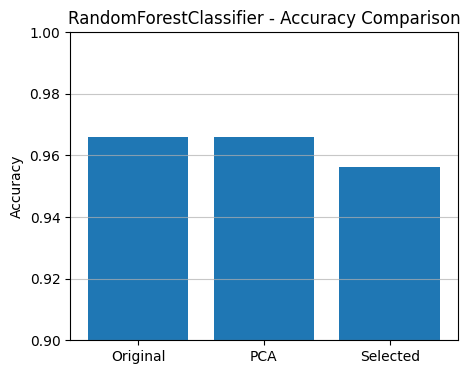

In [ ]:
# Dataset for classification
df_cancer_RF = df_cancer_full.copy()

# Drop ID column
X = df_cancer_RF.drop(columns=['Sample code number', 'Class'], errors='ignore')
y = df_cancer_RF['Class'].replace({2: 0, 4: 1})

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

# Standardize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# PCA
pca = PCA(n_components=0.95, random_state=0)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Feature Selection using SelectKBest
k = min(3, X_train.shape[1])
selector = SelectKBest(score_func=f_classif, k=k)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)
selected_features = X.columns[selector.get_support()]

print(f"Selected Top {k} Features: {selected_features.tolist()}\n")

# Define Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=0)

# Train & Evaluate on Original Data
rf.fit(X_train_scaled, y_train)
acc_orig = accuracy_score(y_test, rf.predict(X_test_scaled))

# Train & Evaluate on PCA Data
rf.fit(X_train_pca, y_train)
acc_pca = accuracy_score(y_test, rf.predict(X_test_pca))

# Train & Evaluate on Selected Features Data
rf.fit(X_train_selected, y_train)
acc_sel = accuracy_score(y_test, rf.predict(X_test_selected))

# Print Results
print("RandomForestClassifier Results (Wisconsin Breast Cancer):")
print(f"Accuracy (Original Data): {acc_orig:.4f}")
print(f"Accuracy (PCA Data): {acc_pca:.4f}")
print(f"Accuracy (Selected Features): {acc_sel:.4f}\n")

# Visualization
plt.figure(figsize=(5,4))
plt.bar(['Original', 'PCA', 'Selected'], [acc_orig, acc_pca, acc_sel])
plt.title("RandomForestClassifier - Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0.9, 1.0)
plt.grid(axis='y', alpha=0.7)
plt.show()

Step 6 – Analysis of Results and Charts:

Linear Regression — Compare MSE

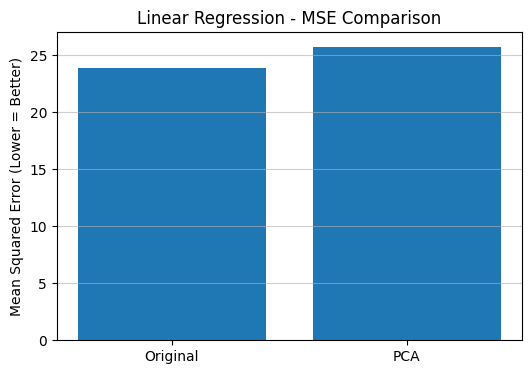

In [ ]:

df_house_lr = df_house_full.copy()
X = df_house_lr.drop(columns=['MEDV'], errors='ignore')
y = df_house_lr['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train models
lr_original = LinearRegression().fit(X_train_scaled, y_train)
lr_pca = LinearRegression().fit(X_train_pca, y_train)

# Predictions
y_pred_original = lr_original.predict(X_test_scaled)
y_pred_pca = lr_pca.predict(X_test_pca)

# Metrics
mse_original = mean_squared_error(y_test, y_pred_original)
mse_pca = mean_squared_error(y_test, y_pred_pca)

# Visualization
plt.figure(figsize=(6,4))
plt.bar(['Original', 'PCA'], [mse_original, mse_pca])
plt.title("Linear Regression - MSE Comparison")
plt.ylabel("Mean Squared Error (Lower = Better)")
plt.grid(axis='y', alpha=0.6)
plt.show()

SGDRegressor

In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)


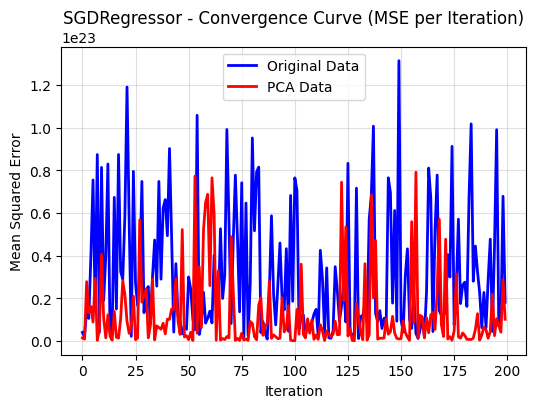

In [ ]:
def sgd_convergence(X_train, y_train, X_test, y_test, a=0.05, max_iter=200):
    model = SGDRegressor(learning_rate='optimal', alpha=a, max_iter=1, warm_start=True, random_state=0)
    mse_list = []
    for _ in range(max_iter):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse_list.append(mean_squared_error(y_test, y_pred))
    return mse_list

losses_orig = sgd_convergence(X_train_scaled, y_train, X_test_scaled, y_test)
losses_pca = sgd_convergence(X_train_pca, y_train, X_test_pca, y_test)

# Visualization
plt.figure(figsize=(6,4))
plt.plot(losses_orig, label='Original Data', color='blue', linewidth=2)
plt.plot(losses_pca, label='PCA Data', color='red', linewidth=2)
plt.title("SGDRegressor - Convergence Curve (MSE per Iteration)")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.grid(alpha=0.4)
plt.show()



KMeans

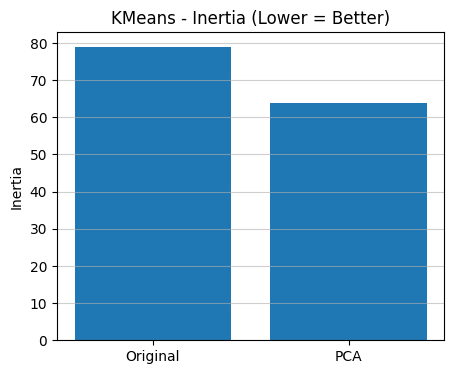

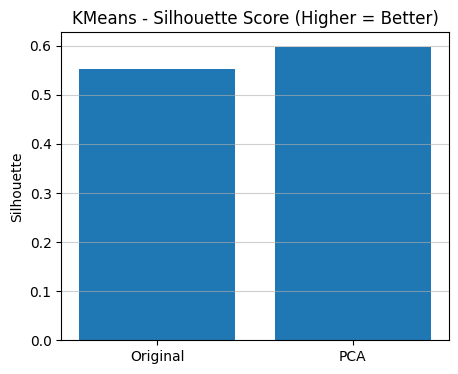

In [ ]:
X = df_iris_full.drop(columns=['Id', 'Species'], errors='ignore')

# PCA
X_pca = PCA(n_components=2).fit_transform(X)

# Original
start = time.time()
kmeans_original = KMeans(n_clusters=3, n_init=10, random_state=0).fit(X)
time_original = time.time() - start
inertia_original = kmeans_original.inertia_
sil_original = silhouette_score(X, kmeans_original.labels_)

# PCA-reduced
start = time.time()
kmeans_pca = KMeans(n_clusters=3, n_init=10, random_state=0).fit(X_pca)
time_pca = time.time() - start
inertia_pca = kmeans_pca.inertia_
sil_pca = silhouette_score(X_pca, kmeans_pca.labels_)

# Inertia Visualization
plt.figure(figsize=(5,4))
plt.bar(['Original', 'PCA'], [inertia_original, inertia_pca])
plt.title("KMeans - Inertia (Lower = Better)")
plt.ylabel("Inertia")
plt.grid(axis='y', alpha=0.6)
plt.show()

# Silhouette Visualization
plt.figure(figsize=(5,4))
plt.bar(['Original', 'PCA'], [sil_original, sil_pca])
plt.title("KMeans - Silhouette Score (Higher = Better)")
plt.ylabel("Silhouette")
plt.grid(axis='y', alpha=0.6)
plt.show()

KNN

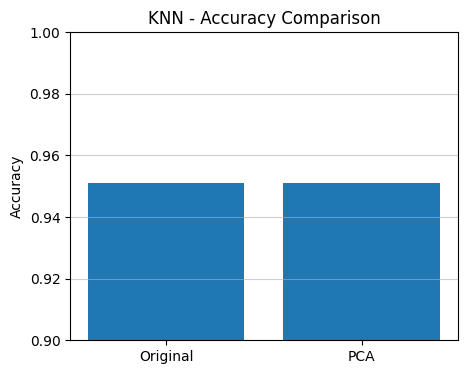

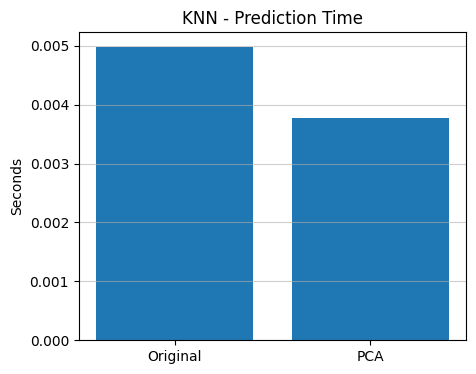

In [ ]:
X = df_cancer_full.drop(columns=['Sample code number','Class'], errors='ignore')
y = df_cancer_full['Class'].replace({2:0,4:1})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

knn = KNeighborsClassifier(n_neighbors=5)

# Original
start = time.time()
knn.fit(X_train_scaled, y_train)
y_pred_orig = knn.predict(X_test_scaled)
time_orig = time.time() - start
acc_orig = accuracy_score(y_test, y_pred_orig)

# PCA
start = time.time()
knn.fit(X_train_pca, y_train)
y_pred_pca = knn.predict(X_test_pca)
time_pca = time.time() - start
acc_pca = accuracy_score(y_test, y_pred_pca)

# Accuracy
plt.figure(figsize=(5,4))
plt.bar(['Original', 'PCA'], [acc_orig, acc_pca])
plt.title("KNN - Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0.9,1.0)
plt.grid(axis='y', alpha=0.6)
plt.show()

# Visualization
plt.figure(figsize=(5,4))
plt.bar(['Original', 'PCA'], [time_orig, time_pca])
plt.title("KNN - Prediction Time")
plt.ylabel("Seconds")
plt.grid(axis='y', alpha=0.6)
plt.show()

Random Forest

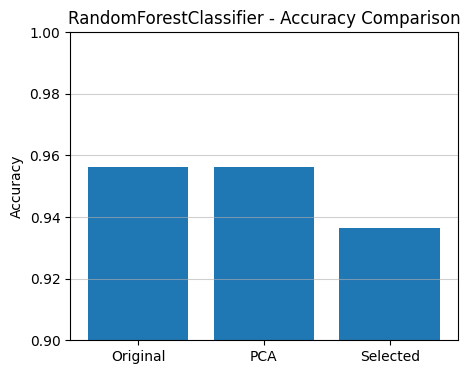

In [ ]:
X = df_cancer_full.drop(columns=['Sample code number','Class'], errors='ignore')
y = df_cancer_full['Class'].replace({2:0,4:1})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Feature selection (SelectKBest)
selector = SelectKBest(score_func=f_classif, k=min(5, X_train.shape[1]))
X_train_sel = selector.fit_transform(X_train_scaled, y_train)
X_test_sel = selector.transform(X_test_scaled)

rf = RandomForestClassifier(random_state=0)

# Original
rf.fit(X_train_scaled, y_train)
acc_orig = rf.score(X_test_scaled, y_test)

# PCA
rf.fit(X_train_pca, y_train)
acc_pca = rf.score(X_test_pca, y_test)

# Selected
rf.fit(X_train_sel, y_train)
acc_sel = rf.score(X_test_sel, y_test)

# Visualization
plt.figure(figsize=(5,4))
plt.bar(['Original', 'PCA', 'Selected'], [acc_orig, acc_pca, acc_sel])
plt.title("RandomForestClassifier - Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0.9,1.0)
plt.grid(axis='y', alpha=0.6)
plt.show()